In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [2]:
df = pd.read_csv('../backup/Tutorial_python/WORK_生命徵象_項目統計.csv', index_col=False)
# np.unique(np.array(df['label']).astype(np.str))


In [3]:
label_dict = {}
for idx, label_ in enumerate(df['label']):
    if label_ not in label_dict.keys():
        label_dict[label_] =[]

In [4]:
value_stack =[]
for idx, (label_, value) in enumerate(zip(df['label'], df['value'])):
    if  value ==np.nan:
        value =0
    
    if (value<=50) and (value>=30):
        label_dict[label_].append(value)
        value_stack.append([value, value])

In [6]:
sorted_stack = []
for i in label_dict:
    if len(label_dict[i])>0:
        sorted_stack.append([np.mean(label_dict[i]), i])
sorted_stack = sorted(sorted_stack)
for i in sorted_stack:
    print(f"{i[1]} - Avg = {i[0]}")

158 - Avg = 30.0
160 - Avg = 30.0
26 - Avg = 30.0
285 - Avg = 30.0
3== - Avg = 30.0
Amp - Avg = 30.0
ECMO C.O. - Avg = 30.0
ECMO(流速) - Avg = 30.0
FIO2(air flow) - Avg = 30.0
FiO2: - Avg = 30.0
ICP M(前) - Avg = 30.0
IUP M - Avg = 30.0
OXIMETER(post) - Avg = 30.0
amp - Avg = 30.0
rate(HZ) - Avg = 30.0
O2   L/min use - Avg = 30.1
0.23 - Avg = 30.5
rr - Avg = 30.5
air flow - Avg = 30.7
INCUBATER - Avg = 30.75
1][ 00 - Avg = 31.0
C.C.I. - Avg = 31.0
HOOD - Avg = 31.0
ICP M<前> - Avg = 31.0
ICP RIGHT - Avg = 31.0
ICPm - Avg = 31.0
PAPD - Avg = 31.0
R't ICP - Avg = 31.0
RATE - Avg = 31.0
SpO2(post-duct) - Avg = 31.0
頭圍 - Avg = 31.0
113 - Avg = 31.1
INCUBATOR TEMP - Avg = 31.125
AIR FLOW - Avg = 31.233333333333334
O2 cannula - Avg = 31.25
o2 nasal cannula - Avg = 31.3
INCUBATOR - Avg = 31.357142857142858
O2 canuula - Avg = 31.5
air cannula - Avg = 31.5
air fiow - Avg = 31.5
右ICP S - Avg = 31.5
保溫箱 - Avg = 31.529411764705884
incuBATOR - Avg = 31.566666666666666
FIO2(air flow L/min) - Avg = 31.6


In [5]:
np.max(value_stack), np.min(value_stack)

(200.0, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


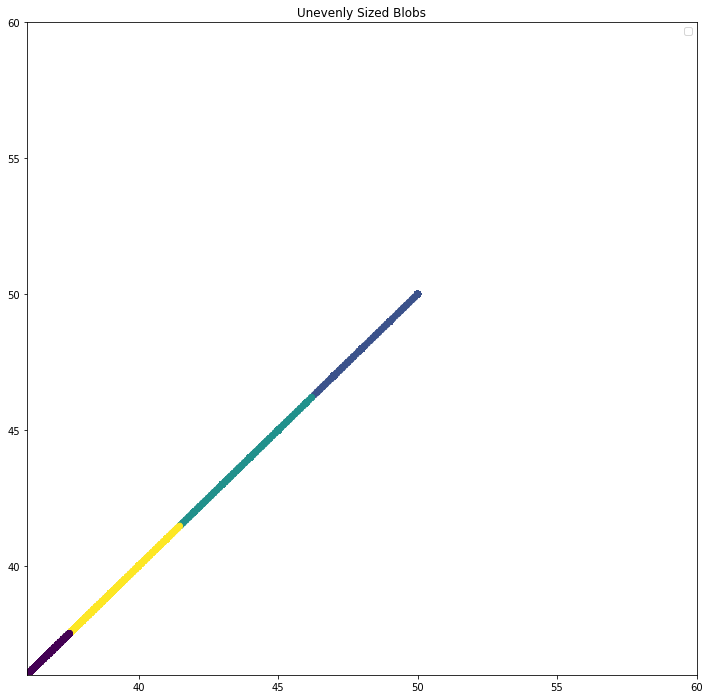

In [7]:
plt.figure(figsize=(12, 12))

# Incorrect number of clusters
y_pred = KMeans(n_clusters=5, random_state=123).fit_predict(np.array(value_stack))
plt.scatter(np.array(value_stack)[:, 0], np.array(value_stack)[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.title("Unevenly Sized Blobs")
plt.legend()
plt.ylim((np.min(value_stack)*1.2,np.max(value_stack)*1.2))
plt.xlim((np.min(value_stack)*1.2,np.max(value_stack)*1.2))
plt.show()